In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM3')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

....

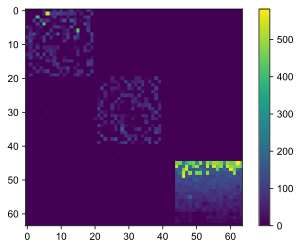

In [3]:
g = dpe.read(0, Tdly=1000)
plt.imshow(g * 1e6)
plt.colorbar()

In [4]:
from scipy.io import loadmat
data_mat = loadmat('data/W_test.mat')

W_test = data_mat['W_test']

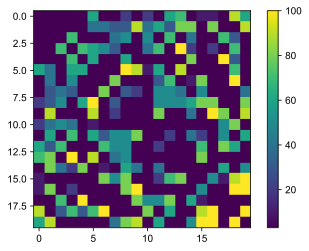

In [6]:
plt.imshow(W_test * 1e6); plt.colorbar()

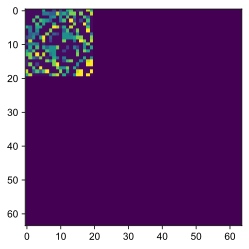

In [7]:
N = 64

Gtarget = np.ones((N,N)) * 0e-6
Gtarget[:W_test.shape[0], :W_test.shape[1]] = W_test
# Gtarget[W_test.shape[0]*1:W_test.shape[0]*2, W_test.shape[1]*1:W_test.shape[1]*2 ] = W_test
# Gtarget[W_test.shape[0]*2:W_test.shape[0]*3, W_test.shape[1]*2:W_test.shape[1]*3 ] = W_test

Msel = Gtarget > 0

plt.imshow(Gtarget)

In [8]:
def myplot(data):
    Gread = data['Ghist'][-1]
    vSet = data['vSetHist'][-1]
    vGateSet = data['vGateSetHist'][-1]
    vReset = data['vResetHist'][-1]
    vGateReset = data['vGateResetHist'][-1]
    
    
    plt.figure(1, figsize=(12,10))
    plt.subplot(2,3,1)
    plt.imshow(Gread * 1e6)
    plt.title(f'Gread: {Gread.min()*1e6:.2f} - {Gread.max()*1e6:.2f}')
    plt.clim(0, 100)
    
    plt.subplot(2,3,2)
    plt.imshow(vSet)
    plt.title(f'vSet {vSet.min():.2f} - {vSet.max():.2f}')
    
    plt.subplot(2,3,3)
    plt.imshow(vGateSet )
    plt.title(f'vGateSet {vGateSet.min():.2f} - {vGateSet.max():.2f}')
    
    plt.subplot(2,3,5)
    plt.imshow(vReset)
    plt.title(f'vReset {vReset.min():.2f} - {vReset.max():.2f}')
    
    plt.subplot(2,3,6)
    plt.imshow(vGateReset )
    plt.title(f'vGateReset {vGateReset.min():.2f} - {vGateReset.max():.2f}')
    
    plt.tight_layout()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())



In [38]:
data = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=300, method='fast',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                            Twidth=10e-6, TwidthReset=10e-3,  Msel=Msel, Gtol=5e-6, numReads=5)

Start programming, step=299, maxBound=37 yield= 85.50%
21 devices to be programmed...reset 38, set 20
Setting 15 devices...
Programming with external timing Twidth=10.000 us
Resetting 6 devices...
Programming with external timing Twidth=10000.000 us


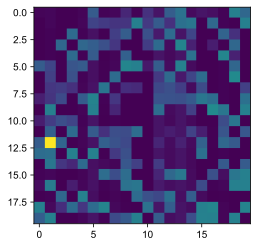

In [39]:
g = dpe.read(0, method='fast')
plt.imshow(g[:20,:20])
# plt.clim((0, 100e-6))

(-20, 20)

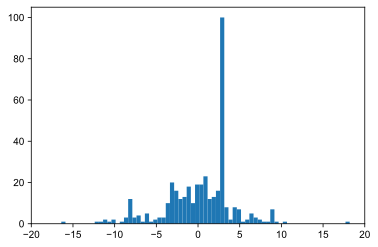

In [44]:
_ = plt.hist((Gtarget-g)[:20,:20].reshape(-1) * 1e6, 400)
plt.xlim(-20, 20)

In [45]:
data2 = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=300, method='fast',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                            Twidth=10e-6, TwidthReset=10e-3,  Msel=Msel, Gtol=30e-6, numReads=1)

Start programming, step=13, maxBound=0 yield= 99.75%
1 devices to be programmed...reset 1, set 0
Setting 0 devices...
Programming with external timing Twidth=10.000 us
Resetting 1 devices...
Programming with external timing Twidth=10000.000 us
------------------------------
Programming completed.


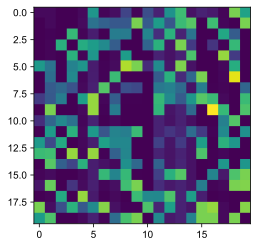

In [46]:
g = dpe.read(0, method='fast')
plt.imshow(g[:20,:20])
# plt.clim((0, 100e-6))

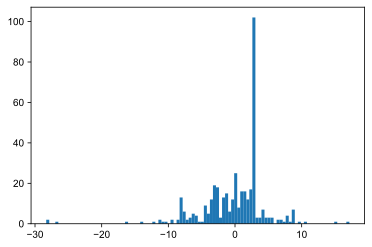

In [51]:
_ = plt.hist((Gtarget-g)[:20,:20].reshape(-1) * 1e6, 100)
# plt.xlim(-20, 20)

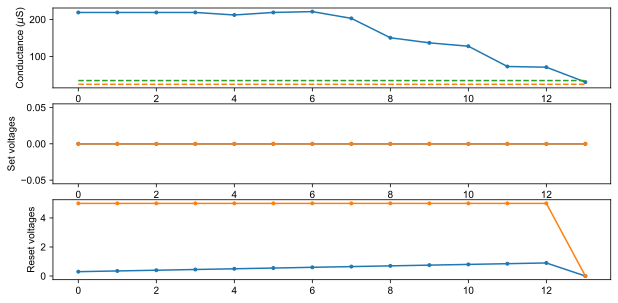

In [50]:
from lib_tune_g import *

plot_history(12, 1, data2, Gtarget)

In [58]:
data3 = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=300, method='fast',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                            Twidth=10e-6, TwidthReset=10e-3,  Msel=Msel, Gtol=15e-6, numReads=3)

Start programming, step=41, maxBound=0 yield= 99.75%
1 devices to be programmed...reset 1, set 0
Setting 0 devices...
Programming with external timing Twidth=10.000 us
Resetting 1 devices...
Programming with external timing Twidth=10000.000 us
------------------------------
Programming completed.


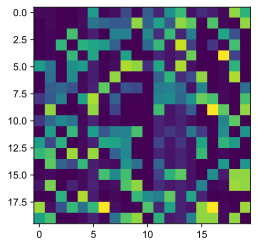

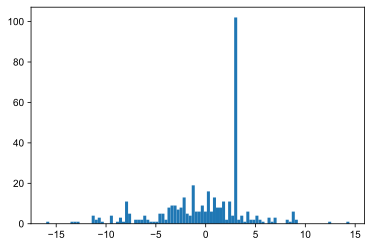

In [60]:
plt.figure(1)
g = dpe.read(0, method='fast')
plt.imshow(g[:20,:20])

plt.figure(2)
_ = plt.hist((Gtarget-g)[:20,:20].reshape(-1) * 1e6, 100)
# plt.xlim(-20, 20)

In [61]:
save_workspace(vars(), note='zhan_power_iter')

Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), data_mat(<class 'dict'>), W_test(<class 'numpy.ndarray'>), N(<class 'int'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), data(<class 'dict'>), data2(<class 'dict'>), data3(<class 'dict'>), to 20200116-174805-zhan_power_iter.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'>), W_test(<class 'numpy.ndarray'>), N(<class 'int'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), to 20200116-174805-zhan_power_iter.mat


In [65]:
input_vectors = np.random.random((20, 1000))

In [66]:
output_vectors = dpe.multiply(0, input_vectors, c_sel=[0, 20])

In [113]:
output_software = Gtarget[:20, :20] @ input_vectors
output_software2 = g[:20, :20] @ input_vectors

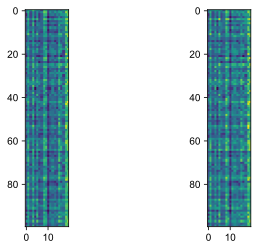

In [114]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(output_vectors[:100])
axes[1].imshow(output_software.T[:100])

In [116]:
factors = []

fig, axes = plt.subplots(4, 5, figsize=(15,10))
for i in range(20):
#     x = output_vectors[:,i]
    x = output_software.T[:,i]
    y = output_software2.T[:,i]
    ax = axes[int(i/5)][i%5]
    ax.plot(x*1e6, y*1e6, '.')
    ax.set_xlim(0,500)
    ax.set_ylim(0,500)
    
    factors.append( np.polyfit(x, y, 1))
fig.tight_layout()

In [83]:
axes.shape

(4, 5)

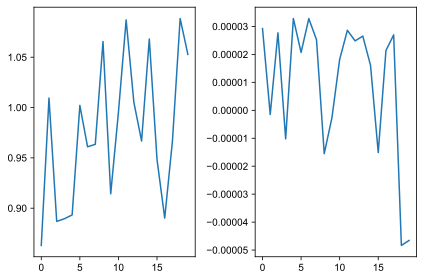

In [102]:
factors = np.array(factors)

fig, axes = plt.subplots(1,2)
axes[0].plot(factors[:,0])
axes[1].plot(factors[:,1])
fig.tight_layout()

In [107]:
save_workspace(vars(), note='zhan-w-1st')

Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), data_mat(<class 'dict'>), W_test(<class 'numpy.ndarray'>), N(<class 'int'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), data(<class 'dict'>), data2(<class 'dict'>), data3(<class 'dict'>), input_vectors(<class 'numpy.ndarray'>), output_vectors(<class 'numpy.ndarray'>), output_software(<class 'numpy.ndarray'>), axes(<class 'numpy.ndarray'>), i(<class 'int'>), x(<class 'numpy.ndarray'>), y(<class 'numpy.ndarray'>), factors(<class 'list'>), output_software2(<class 'numpy.ndarray'>), to 20200116-182510-zhan-w-1st.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'>), W_test(<class 'numpy.ndarray'>), N(<class 'int'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), input_vectors(<class 'numpy.ndarray'>), output_vectors(<class 'numpy.ndarray'>), output_software(<class 'numpy.ndarray'>), axes(<class 'numpy.ndarray'>), i(<class 'int'>), x(<class 'numpy.ndarray'>), y(<class 'num